<a href="https://colab.research.google.com/github/jcdumlao14/Supervised-Learning-Algorithms--Challenge/blob/main/2_Challenge_DecisionTreeClassifier_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Classifier**

# **Objectives**

Predict whether or not an object is a mine or a rock given the strength of sonar returns at different angles.

The data is taken from DataHub.

# **Tasks**

1. Load the data from https://raw.githubusercontent.com/dphi-official/Datasets/master/sonar.csv

2. Create a Decision Tree Classifier on the data and train it

3. Determine the accuracy score and f1 score of the model.

4. Tweak the parameters(like no. of trees) to improve model performance
How many trees give the best result?

5. Visualise the Decision Tree created by plotting it

# **Loading Libraries**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from matplotlib import style
#styling the outputs
font={'family':'sans-serif',
      'weight':'bold',
      'size':18}
plt.rc('font',**font)
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")



# **Loading Data**


In [ ]:
pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sonar.csv')

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [ ]:
sonar_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sonar.csv')


Now, let's examine our dataframe:



In [ ]:
sonar_df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [ ]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

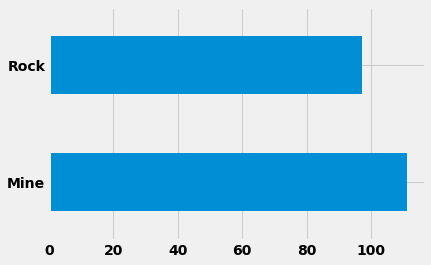

In [ ]:
sonar_df['Class'].value_counts().plot(kind='barh')

There are not much difference between the classes proportion, so I will not apply any rebalance to it.

In [ ]:
inputs_df = sonar_df.drop('Class', axis=1)
inputs_df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [ ]:
targets_df = pd.get_dummies(sonar_df['Class'])
targets_df

,Mine,Rock
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


# **Missing Values**

In [ ]:
sonar_df.isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
Class           0
Length: 61, dtype: int64

I choose to split it into two Series object in a way for me to test the classification results for each one.

# **Separating input variables (X) and target variable (y)**

Y has the labels, our answers column. X is all the rest of the data - the features, without the labels (The Class column). This separation would hopefully be clearer in a few cells

In [ ]:
rock_y_df = targets_df['Rock']
mine_y_df = targets_df['Mine']

We must then split our data into train and test for we to be able to measure the model generalization as we predict unseen data by the model.

This step has a great impact on the model selection stage.

# **Train and Test Split**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_df, mine_y_df, test_size=0.30, random_state=42)

To Calculate F1 score

We are using DecisionTreeClassifier as a model to train the data. We are training the model with cross_validation which will train the data on different training sets and it will calculate f1 the score for all the test train splits. We are printing the f1 score for all the splits in cross-validation and we are also printing the mean and standard deviation of the f1 score.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

In [ ]:
print(cross_val_score(dec_tree, X_train, y_train, scoring="f1", cv = 7))
mean_score = cross_val_score(dec_tree, X_train, y_train, scoring="f1", cv = 7).mean()
std_score = cross_val_score(dec_tree, X_train, y_train, scoring="f1", cv = 7).std()
print(mean_score)
print(std_score)

[0.76190476 0.69565217 0.83333333 0.57142857 0.60869565 0.81818182
 0.5       ]
0.7043402973837756
0.09224265780533171


# **Building ML Model**

Now we are finally ready, and we can train the model.

First, we need to import our model - A decision tree classifier (again, using the sklearn library).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# **Evaluate the model**

Now we have a model. Let's evaluate it by using the accuracy_score function. 

In [ ]:
#!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 1.0
Test accuracy 0.6825396825396826


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data= export_graphviz(model, out_file=None,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

In [ ]:
graph1=graphviz.Source(dot_data)

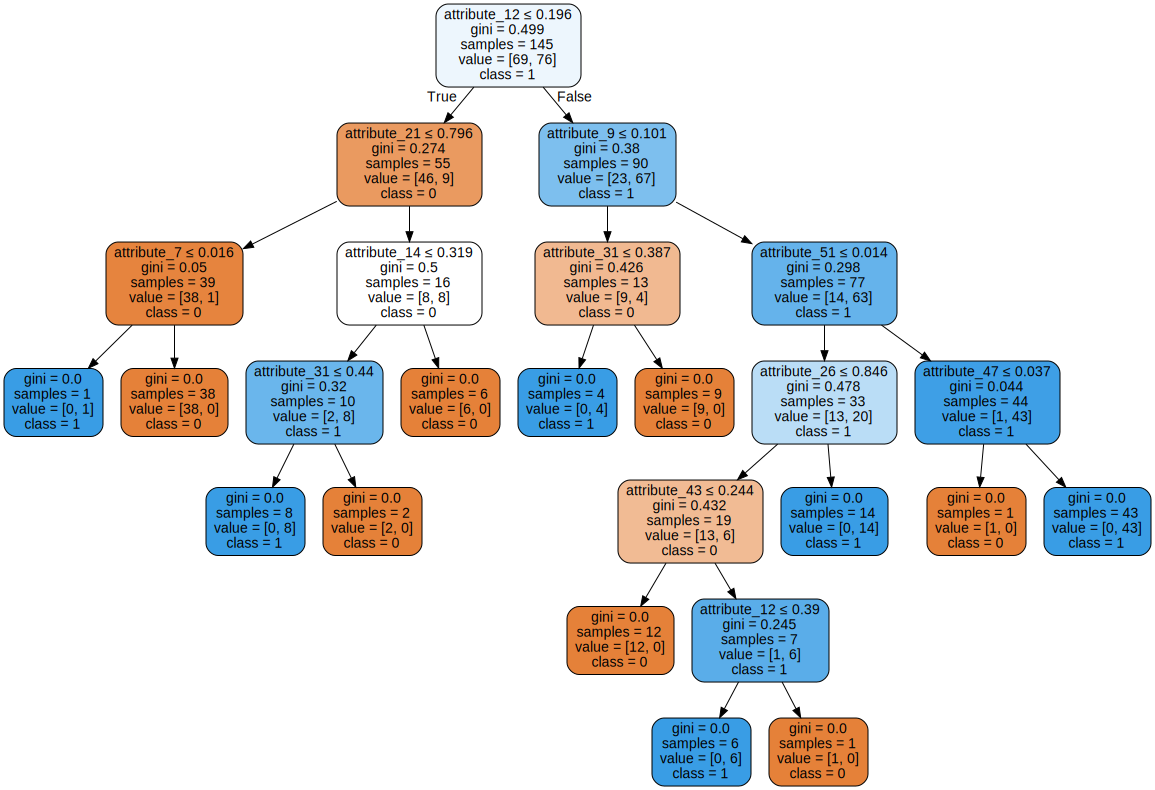

In [ ]:
graph1

# **Improve the model**

In [ ]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8896551724137931
test score... 0.7142857142857143


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model_improved, X_train, y_train, cv=10, scoring='accuracy')
print('Avarage train score...' , cv_score.mean())
print('Std train score...' , cv_score.std())

Avarage train score... 0.6885714285714286
Std train score... 0.08799092923772264


In [ ]:
cv_score

array([0.66666667, 0.66666667, 0.73333333, 0.73333333, 0.8       ,
       0.5       , 0.57142857, 0.78571429, 0.71428571, 0.71428571])

In [ ]:
from sklearn.model_selection import cross_val_score
for depth in range(2, 6):
  print('With depth:',depth)
cv_score = cross_val_score(DecisionTreeClassifier(max_depth = depth, max_features = None),
X_train, y_train, cv=10, scoring='accuracy')
print(' Avarage train score...' , cv_score.mean())
print(' Std train score...' , cv_score.std())

With depth: 2
With depth: 3
With depth: 4
With depth: 5
 Avarage train score... 0.7223809523809523
 Std train score... 0.11076010316677547


Let's visualize the tree again using the same code snippet from above:

In [ ]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True)

In [ ]:
graph2=graphviz.Source(dot_data)

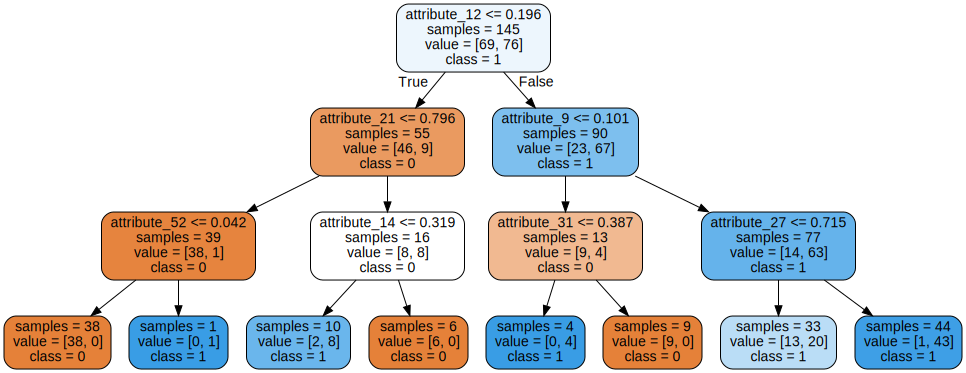

In [ ]:
graph2

# **Optimization**

GridSearchCV with Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[i for i in range(2, 6)],
'criterion':['gini', 'entropy'],
'max_features':['auto', 'sqrt', 'log2', None]}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=2, scoring='accuracy')
clf.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='accuracy', verbose=2)

In [ ]:
print('Best Hyperparameters:', clf.best_params_)
print('Score:', clf.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt'}
Score: 0.7942857142857143


In [ ]:
print('train score...' , accuracy_score(y_train, clf.predict(X_train)))
print('test score...', accuracy_score(y_test, clf.predict(X_test)))

train score... 0.8896551724137931
test score... 0.6507936507936508


## **GridSearchCV with Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[i for i in range(10, 110, 10)],
'max_depth':[i for i in range(2, 6)],
'criterion':['gini', 'entropy'],
'max_features':['auto', 'sqrt', 'log2', None]}

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, verbose=2, scoring='accuracy')
clf.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] 

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=2)

In [ ]:
print('Best Hyperparameters:', clf.best_params_)
print('Score:', clf.best_score_)
print('train score...' , accuracy_score(y_train, clf.predict(X_train)))
print('test score...', accuracy_score(y_test, clf.predict(X_test)))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 60}
Score: 0.8538095238095238
train score... 1.0
test score... 0.8412698412698413


As we can see the best hyperparameters score gives an 84% score.